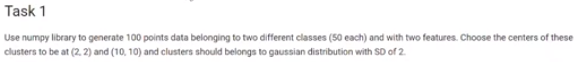

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x1 = np.random.normal(2, 2, 100).reshape(50,2)
x2 = np.random.normal(10, 2, 100).reshape(50,2)

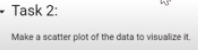

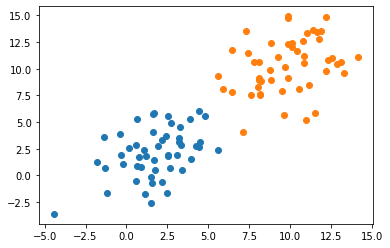

In [3]:
plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1])

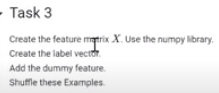

In [4]:
X = np.concatenate((x1, x2))
labels = np.concatenate((np.zeros(50), np.ones(50))).astype(int)

In [5]:
X = np.concatenate((np.ones(X.shape[0]).reshape(-1,100), X.T)).T #add dummy to X

In [6]:
a = np.random.permutation(100)
X = X[a]
labels = labels[a]

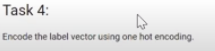

In [7]:
labels = np.eye(2)[labels]

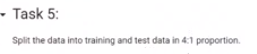

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(80, 3) (80, 2) (20, 3) (20, 2)


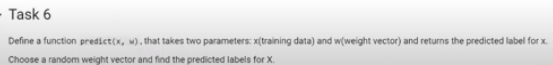

In [9]:
def predict(x, w):
    z = x @ w
    return np.argmax(z, axis=1)

In [10]:
#creating dummy weight vector to test. weight vector has the shape m x 2
w = np.random.rand(x_train.shape[1], y_train.shape[1])
predict(x_train, w)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

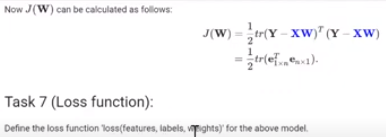

In [11]:
def loss(x, y, w):
    e = y - x @ w
    return 0.5 * np.trace(e.T @ e)

In [12]:
loss(x_train, y_train, w)

4021.04381177472

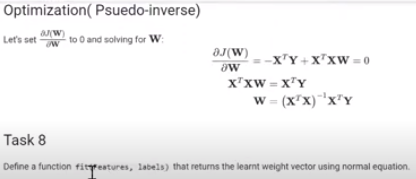

In [13]:
#Find weight vector through normal equation method
def fit(x, y):
    return np.linalg.pinv(x.T @ x) @ x.T @ y

In [14]:
# Finding the new weight vector
w = fit(x_train, y_train)
loss(x_train, y_train, w)

3.1186924150472755

In [15]:
#Predicting using the new weight vector
predicted_output = predict(x_train, w)
print(predicted_output)
# THis must roughly agree with y_train (one-hot decoded)
original_output = np.argmax(y_train, axis=1)
print(original_output)

[0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1
 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 0 0]
[0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1
 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 0 0]


In [16]:
#counts must be roughly equal
print(predicted_output[predicted_output==1].sum())
print(original_output[original_output==1].sum())

39
39


In [17]:
#Predicting using the new weight vector
predicted_output = predict(x_test, w)
print(predicted_output)
# THis must roughly agree with y_train (one-hot decoded)
original_output = np.argmax(y_test, axis=1)
print(original_output)

[1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1]
[1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1]


In [18]:
#counts must be roughly equal
print(predicted_output[predicted_output==1].sum())
print(original_output[original_output==1].sum())

11
11


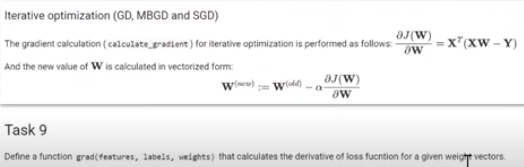

In [19]:
def grad(x, y, w):
    return x.T @ (x @ w - y)

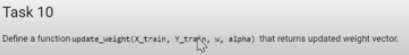

In [20]:
def update_weights(x, y, w, alpha):
    return w - alpha * grad(x, y, w)

In [21]:
w = update_weights(x_train, y_train, w, 1e-5)
w

array([[ 1.0946476 , -0.0946476 ],
       [-0.0707091 ,  0.0707091 ],
       [-0.03510806,  0.03510806]])

In [22]:
# let's find the loss (while using gradient-descent).  
# When update_weights is run epoch number of times, 
# the loss should roughly match with the loss calculated through normal equation.
loss(x_train, y_train, w)

3.118692415047275

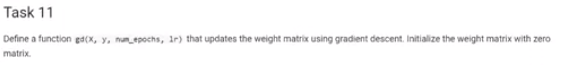

In [23]:
def gd(x, y, num_epochs, lr):
    w = np.zeros((x.shape[1], y.shape[1]))
    for i in range(num_epochs):
        w = update_weights(x, y, w, lr)
    return w

w = gd(x_train, y_train, 100000, 1e-5)

In [24]:
#What loss does this weight vector generate?
loss(x_train, y_train, w)

3.1186924150472746

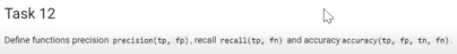

In [25]:
def calculate_metrics(x, y):
    y_hat = predict(x, w)
    y = np.argmax(y, axis=1)
    print(y_hat, y)
    
    tp = np.where((y == 1) & (y_hat == 1), 1, 0).sum()
    fn = np.where((y == 1) & (y_hat == 0), 1, 0).sum()
    fp = np.where((y == 0) & (y_hat == 1), 1, 0).sum()
    tn = np.where((y == 0) & (y_hat == 0), 1, 0).sum()
    
    print(tp, fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + fp) / (tp + fp + tn + fn)
    F1 = 0.5 * (precision * recall)/(precision + recall)
    
    return precision, recall, accuracy, F1

In [26]:
calculate_metrics(x_test, y_test)

[1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1] [1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1]
11 0


(1.0, 1.0, 0.55, 0.25)